In [ ]:
from pylab import *

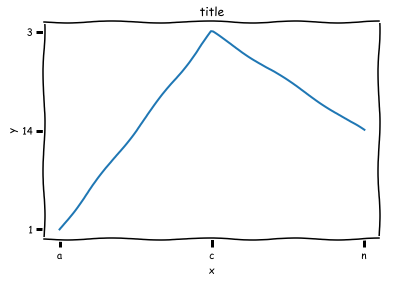

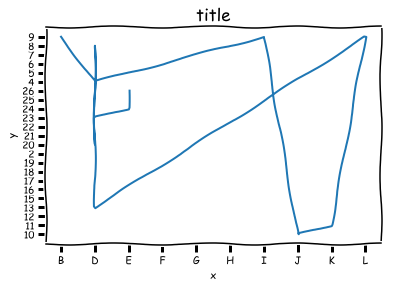

In [15]:
%matplotlib inline
from matplotlib.pyplot import figure, plot, xlabel, ylabel, title, show, xkcd
# connect to a QlikEngine and initialize pyqlikengine
from pyqlikengine import pyqlikengine
url = "ws://localhost:4848/app"
qixe = pyqlikengine.QixEngine(url)

# this section creates an app, loads some data, makes a few selections in a dimension, creates a hypercube, converts the hypercube 
# to a list of columns that we can use to plot a chart
app = qixe.create_app('first_app')
qixe.open_app(app)
qixe.load_script("Load Chr(RecNo()+Ord('A')-1) as AlphaUpper, Chr(RecNo()+Ord('a')-1) as AlphaLower,  RecNo() as Num autogenerate 26;")
qixe.select_in_dimension('AlphaUpper', ['A', 'C', 'N'])
hc = qixe.create_hypercube(["AlphaUpper","AlphaLower"], ['=Sum(Num)', '=Avg(Num)', 'Sum(Num)/7'])
mtrx = qixe.convert_hypercube_to_matrix(hc[0], hc[1])

# in our app, we select the complementing values by calling select_excluded on the dimension we first made selections in
qixe.select_excluded_in_dimension("AlphaUpper")
hc2 = qixe.create_hypercube(["AlphaUpper","AlphaLower"], ['=Sum(Num)', '=Avg(Num)', 'Sum(Num)/7'])
tbl = qixe.convert_hypercube_to_inline_table(hc2[0], 'my_table2')
qixe.delete_app(app)

# create a new app and load the "excluded" data
app2 = qixe.create_app('second_app')
qixe.open_app(app2)
qixe.load_script(tbl)
hc3 = qixe.create_hypercube(["Column0"], ['=Sum(Column3)'])
mtrx2 = qixe.convert_hypercube_to_matrix(hc3[0], hc3[1])
qixe.delete_app(app2)

#Plot charts from both apps using matplotlib
figure()
plot(mtrx[1], mtrx[2])
xlabel('x')
ylabel('y')
title('title')
show()


figure()
plot(mtrx2[0], mtrx2[1])
xkcd(3,3,3)
xlabel('x')
ylabel('y')
title('title')
show()
